# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [5]:
import numpy as np
#Copio Df
data = df
#Hay missing values
data.isnull().sum()


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Convertimos num_doors y num_cylinders para tratar como enteras. Inicialmente se remplazan missing values por cero.

In [6]:
data['num_doors'] = data.num_doors.map({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'zero':0})
data['num_cylinders'] = data.num_cylinders.map({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'zero':0})
data['num_doors'].fillna(0, inplace=True)
data['num_cylinders'].fillna(0, inplace=True)
data['num_doors'] = data['num_doors'].astype('int64')
data['num_cylinders'] = data['num_cylinders'].astype('int64')
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

# Para saber si aplico media o mediana a los missing values miro los outliers por variable, diferente a las categoricas.

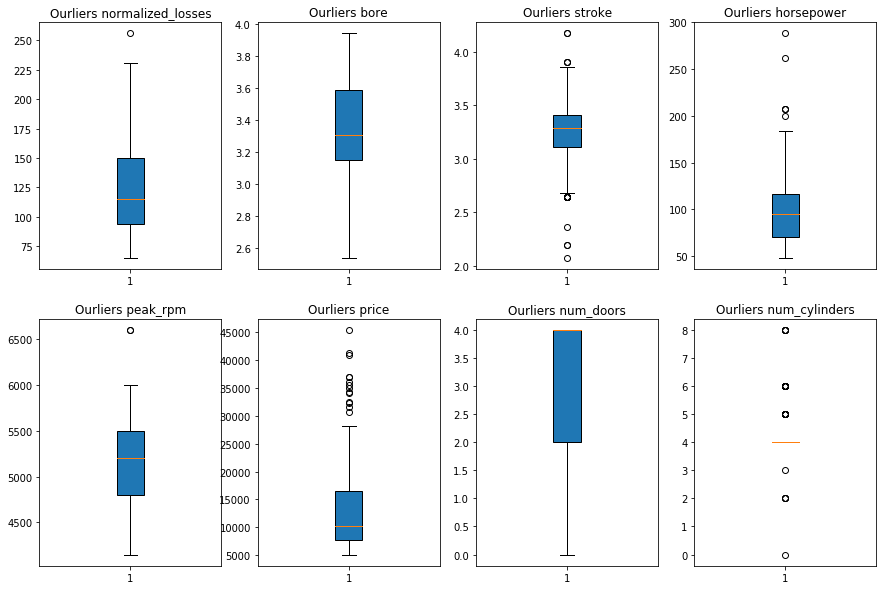

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
fig, axs = plt.subplots(2, 4,figsize=(15, 10))
axs[0, 0].boxplot(data.normalized_losses.dropna(),patch_artist=True)
axs[0, 0].set_title('Ourliers normalized_losses')
axs[0, 1].boxplot(data.bore.dropna(),patch_artist=True)
axs[0, 1].set_title('Ourliers bore')
axs[0, 2].boxplot(data.stroke.dropna(),patch_artist=True)
axs[0, 2].set_title('Ourliers stroke')
axs[0, 3].boxplot(data.horsepower.dropna(),patch_artist=True)
axs[0, 3].set_title('Ourliers horsepower')
axs[1, 0].boxplot(data.peak_rpm.dropna(),patch_artist=True)
axs[1, 0].set_title('Ourliers peak_rpm')
axs[1, 1].boxplot(data.price.dropna(),patch_artist=True)
axs[1, 1].set_title('Ourliers price')
axs[1, 2].boxplot(data.num_doors.dropna(),patch_artist=True)
axs[1, 2].set_title('Ourliers num_doors')
axs[1, 3].boxplot(data.num_cylinders.dropna(),patch_artist=True)
axs[1, 3].set_title('Ourliers num_cylinders')

plt.show()

In [10]:
# Aplico mediana cuando hay outlier, media cuando no hay outlier
data['num_doors'].replace(0, data.num_doors.mean(), inplace=True)
data['num_cylinders'].replace(0, data.num_cylinders.median(), inplace=True)
data.normalized_losses.fillna(data.normalized_losses.median(), inplace=True)
data.bore.fillna(data.bore.mean(), inplace=True)
data.stroke.fillna(data.stroke.median(), inplace=True)
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data.peak_rpm.fillna(data.peak_rpm.median(), inplace=True)
data.price.fillna(data.price.median(), inplace=True)
data.dropna(inplace=True)
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Se verifica que no haya missing values

In [11]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [12]:
# Se define función para raiz de menor error cuadratico medio
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [13]:
# Se definen data frames para variables categoricas y no categoricas
#Categoricas
X_ = data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','num_cylinders','num_doors'], axis=1)

#Numericas
X = data.drop(['price','make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], axis=1)
Xa = data.drop(['price','make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], axis=1)

y = data['price']

X_ = pd.get_dummies(X_)

X = X.join(X_)

X.head()

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


# Modelo usando solo variables numéricas

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(Xa,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=1, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)

6070.675738402134

Se buscan mejores valores para los parametros

In [15]:
ARMSE = []
m = 1000000
for i in range(1,40):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)
        

1   6070.675738402134
3   5767.306606721037
4   3715.632696478192
8   3603.363156323196
10   3589.8396701700876
11   3482.252416793652


Text(0, 0.5, 'RMSE')

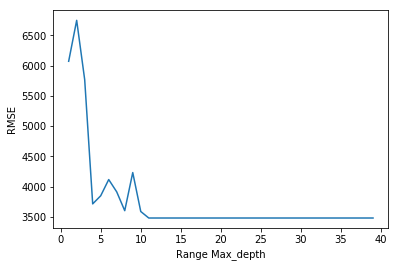

In [16]:
plt.plot(range(1,40), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [17]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=11, n_estimators = i,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   3482.252416793652
2   2509.3361686247736
7   2280.743051926893
8   2086.8912625965604
27   2069.580117632837
28   2025.231733263245
29   1984.684937350475
33   1964.5872352525423
34   1934.6523423041076
36   1925.9926064829835
38   1916.9081889053962


Text(0, 0.5, 'RMSE')

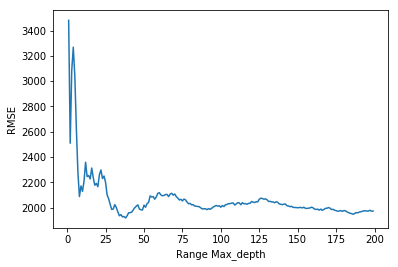

In [18]:
plt.plot(range(1,200), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [19]:
ARMSE = []
m = 1000000
for i in range(1,Xa.shape[1]):
    clf = RandomForestRegressor(max_depth=11, n_estimators = 38,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1916.9081889053957
3   1504.3522935186306


Text(0, 0.5, 'RMSE')

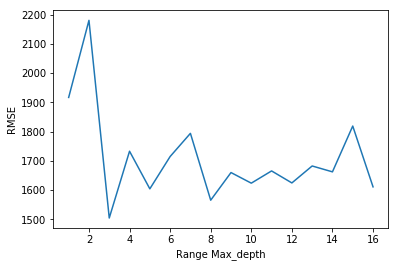

In [20]:
plt.plot(range(1,Xa.shape[1]), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [21]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=11, n_estimators = 38,max_features=3,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1504.3522935186304
127   1478.2262705115438
180   1459.6564425702966


Modelo variables numericas RMSE 1459.6564 con max_depth=11, n_estimators = 38,max_features=3 y random_state=180

# Modelo usando solo variables categoricas

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=1, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)

5903.268861009583

In [24]:
ARMSE = []
m = 1000000
for i in range(1,40):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)
        

1   5903.268861009583
4   5742.445930139445
5   5566.915091675227
6   5409.762145144661
7   5181.415335316001
9   5046.335484743889
10   4598.697116492748
11   4446.554322326554
14   4171.038504540162
16   3814.199779175526


Text(0, 0.5, 'RMSE')

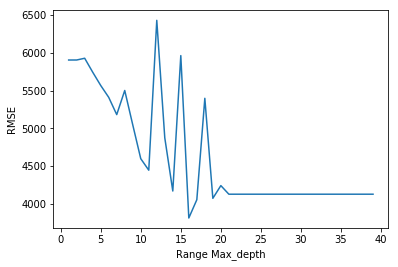

In [25]:
plt.plot(range(1,40), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [26]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=16, n_estimators = i,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   3814.199779175526
2   3388.510009209797
3   2916.009617860925
4   2600.8879113714775
5   2359.5420510539766
6   2330.491637111424
28   2328.780189625208
31   2326.767637638837
35   2324.813554934264
36   2320.3413697456276
37   2285.865790043548
46   2278.5826534238386
47   2271.4081680912523
48   2259.468283795002
49   2250.212700581804
50   2229.5146677392718
89   2226.911024457171
91   2226.552818944041
93   2225.7605658986995
94   2221.1109870749156
95   2212.8024336658646
96   2206.105447086862
100   2200.7132519034362
101   2198.4337854329365
102   2192.9119822527737
124   2189.712879061783
125   2187.192241635093
129   2179.7866640961543
130   2175.3329498681983
132   2171.27757984207
133   2171.157468080369
137   2167.8005890114946
138   2165.2817544912878
139   2162.837836478169


Text(0, 0.5, 'RMSE')

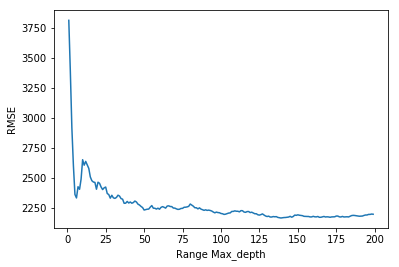

In [27]:
plt.plot(range(1,200), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [28]:
ARMSE = []
m = 1000000
for i in range(1,X_.shape[1]):
    clf = RandomForestRegressor(max_depth=16, n_estimators = 139 ,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2162.837836478169
2   2105.7588989057012
7   2093.6582785696396
9   2079.529307124832
11   2054.800706570909
17   2032.614022279117
20   2017.9299809100492
24   2007.8161001562908


Text(0, 0.5, 'RMSE')

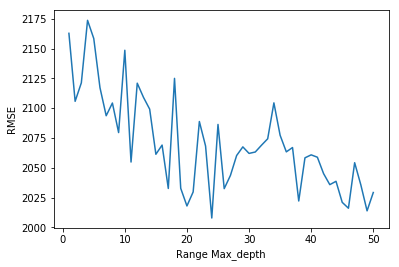

In [29]:
plt.plot(range(1,X_.shape[1]), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [30]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=16, n_estimators = 139,max_features=24,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2007.8161001562908
14   1991.06461947294
37   1981.2953215430698
171   1981.0053932179421


Modelo variables categoricas RMSE 1981.2953 con max_depth=16, n_estimators = 139,max_features=24 y random_state=171

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

# Modelo completo variables categóricas y no categóricas

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=1, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)


6047.72861701816

In [32]:
ARMSE = []
m = 1000000
for i in range(1,40):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   6047.72861701816
4   5087.720470945384
5   5079.903824224087
7   4172.511689433364
10   3589.0156625702134
12   2941.005121336513


Text(0, 0.5, 'RMSE')

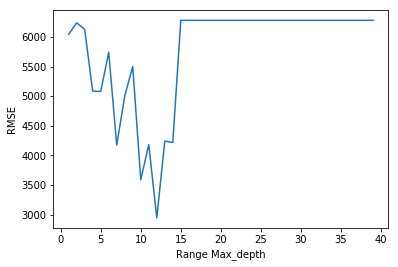

In [33]:
plt.plot(range(1,40), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [34]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=12, n_estimators = i ,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2941.005121336513
2   2912.613892686362
3   2824.384377099324
4   2583.989609815118
5   2363.878751298926
6   2243.457894839183
8   2166.364262838597
9   2166.210701704371
10   2111.699611390021
12   1990.5438457897217
13   1967.079561716028
21   1930.1020753395135
26   1920.0446478177441


Text(0, 0.5, 'RMSE')

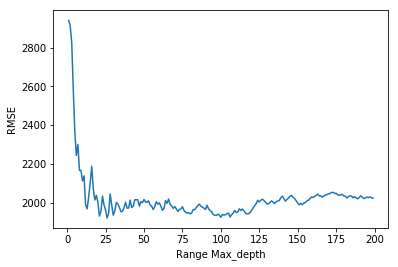

In [35]:
plt.plot(range(1,200), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [36]:
ARMSE = []
m = 1000000
for i in range(1,X.shape[1]):
    clf = RandomForestRegressor(max_depth=12, n_estimators = 26 ,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1920.044647817744
3   1748.477521245513
11   1589.2665327613115
19   1404.2578169701465
46   1372.4827577137416


Text(0, 0.5, 'RMSE')

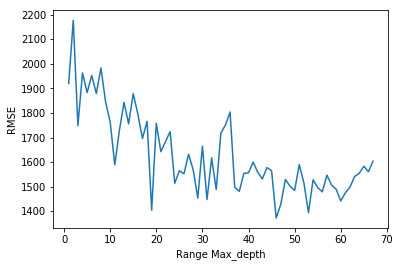

In [37]:
plt.plot(range(1,X.shape[1]), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [38]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=12, n_estimators = 26 ,max_features=46,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1372.4827577137419


Modelo completo con todas las variables numéricas y dummies:
RMSE 1372.4827 con max_depth=12, n_estimators = 26 ,max_features=46 y random_state=1


# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

# Con binary

In [39]:
import category_encoders as ce
X_ = ce.BinaryEncoder().fit_transform(data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','num_doors','num_cylinders'], axis=1))
X = data.drop(['price','make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], axis=1)
y = data['price']
X = X.join(X_)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)

In [41]:
ARMSE = []
m = 1000000
for i in range(1,40):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1 ,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   6244.141997839044
2   6091.998643981161
3   4192.647597094003
6   2469.427799905024
13   2150.0249690139676


In [45]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=13, n_estimators = i ,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2150.0249690139676
7   2086.681708742102
12   2080.673312846868
13   1961.6571199088157
14   1844.5630467684293
46   1820.17477485065
47   1808.098709724487
54   1802.1516375593003


In [46]:
ARMSE = []
m = 1000000
for i in range(1,X.shape[1]):
    clf = RandomForestRegressor(max_depth=13, n_estimators = 54 ,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1802.1516375593003
3   1698.4107794564322
4   1638.1299575076112
5   1425.7653742921818


In [47]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=13, n_estimators = 54 ,max_features=5,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1425.7653742921818
130   1366.911836055691


Para Binary el menor RMSE es 1366.9118 con max_depth=13, n_estimators = 54 ,max_features=5,random_state=130

# Con Hashing

In [48]:
# Modelo usando variables nominales
# n_components= numero de columnas expandidas, por defecto 8
X_ = ce.HashingEncoder(n_components=8).fit_transform(data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','num_doors','num_cylinders'], axis=1))
X = data.drop(['price','make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'], axis=1)
y = data['price']
X = X.join(X_)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)

In [50]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1 ,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   6083.887599484774
4   4727.203872819685
6   2617.301413719677


In [51]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=6, n_estimators = i ,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2617.301413719677
23   2614.5025991089847
25   2590.650442530973
26   2575.106161179317
27   2537.1957493946425
28   2485.6662699516028
29   2448.437077696604
30   2437.4798589542575
31   2434.7379883252847
33   2421.671029458282
34   2389.3552520230633
36   2344.5055308252504
47   2338.0076497078708
48   2305.2183012722417
51   2300.4173412754403
52   2272.406271673821
53   2254.0871770814333
59   2243.415090430687
105   2238.3404141164356
106   2218.832433010163
110   2209.7382491699077
111   2208.436633673773
113   2204.0325493942996
116   2193.0645687282567
127   2188.2760443760244
137   2187.852493284283
138   2183.349221353568
139   2179.57637541813
140   2171.8936690366636
153   2166.0911409491405
154   2161.990343461437
162   2157.063724132082


In [52]:
ARMSE = []
m = 1000000
for i in range(1,X.shape[1]):
    clf = RandomForestRegressor(max_depth=6, n_estimators = 162 ,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2157.063724132082
2   1942.8452217695033
3   1848.2856443431897
4   1812.151784002342
5   1673.5860233904687
6   1661.0048289790614
7   1634.4081588861357
10   1587.1000774946103


In [184]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=6, n_estimators = 162 ,max_features=10,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   1587.1000774946103
121   1534.431629018505


Para Hashing el menor RMSE es 1534,4316 con max_depth=6, n_estimators = 162 ,max_features=10 y random_state=121

El orden de acuerdo el menor RMSE es:
    1. Modelo completo - variables binarias: 1366.9118
    2. Modelo completo - variables dummies:  1372.4827
    3. Modelo completo - variables hashing:  1534.4316 